In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql.functions import array_contains, explode
import plotly.express as px
from pyspark.sql import functions as F
from dotenv import load_dotenv
import os

load_dotenv()

In [ ]:
ENDPOINT = os.getenv('ENDPOINT')
ACCOUNT_KEY = os.getenv('ACCOUNT_KEY')
DATABASE = os.getenv('DATABASE')
CONTAINER = os.getenv('CONTAINER')

In [0]:
df = spark.read.format("cosmos.oltp") \
    .option("spark.cosmos.accountEndpoint", ENDPOINT) \
    .option("spark.cosmos.accountKey", ACCOUNT_KEY) \
    .option("spark.cosmos.database", DATABASE) \
    .option("spark.cosmos.container", CONTAINER)\
    .load()
df.show()

+-------+--------------------+---+------------+--------------------+-----------+----------+--------------------+
|book_id|          book_title| id|release_date|         book_author|readability|word_count|       book_category|
+-------+--------------------+---+------------+--------------------+-----------+----------+--------------------+
|    202|My Bondage and My...|202|  2008-07-02| Douglass, Frederick|      64.54|    126137|[African American...|
|    203|    Uncle Toms Cabin|203|  2006-01-13|Stowe, Harriet Be...|      78.08|    167662|[Banned Books fro...|
|    204|The innocence of ...|204|  2008-07-09|Chesterton, G. K....|      78.28|     75579|[Crime/Mystery, F...|
|    205|Walden and On The...|205|  1995-01-01|Thoreau, Henry David|      68.33|    111280|[Biographies, Cul...|
|    206|The Martin Luther...|206|  2008-06-29|             Various|      62.82|    130924|[Culture/Civiliza...|
|    207|The Spell of the ...|207|  1995-01-01|Service, Robert W...|      78.32|     20727|[Cult

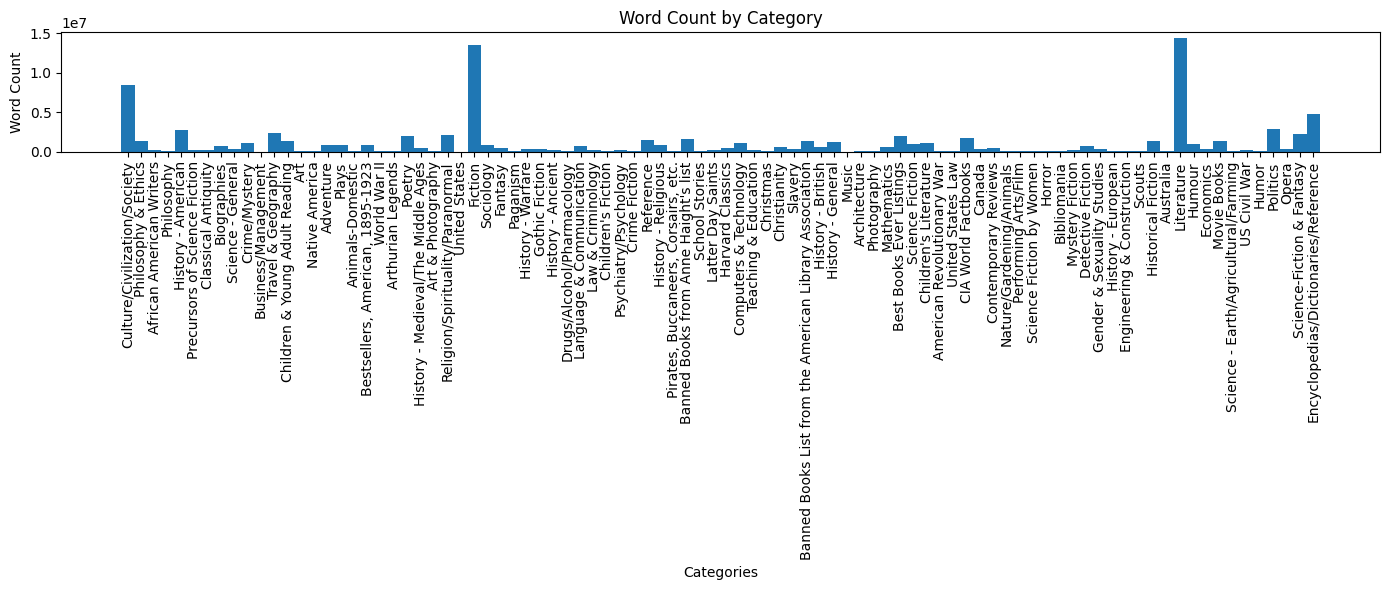

In [0]:
def word_count_by_category():
    wc_df = df.withColumn('category', explode(F.col('book_category')))
    grouped = wc_df.groupBy('category').agg(F.sum('word_count').alias('count'))
    
    df_pandas = grouped.toPandas()

    plt.figure(figsize=(14, 6))
    plt.bar(df_pandas['category'], df_pandas['count'], width=1)
    plt.title('Word Count by Category')
    plt.xlabel('Categories')
    plt.xticks(rotation=90)
    plt.ylabel('Word Count')
    plt.tight_layout()
    plt.show()

word_count_by_category()

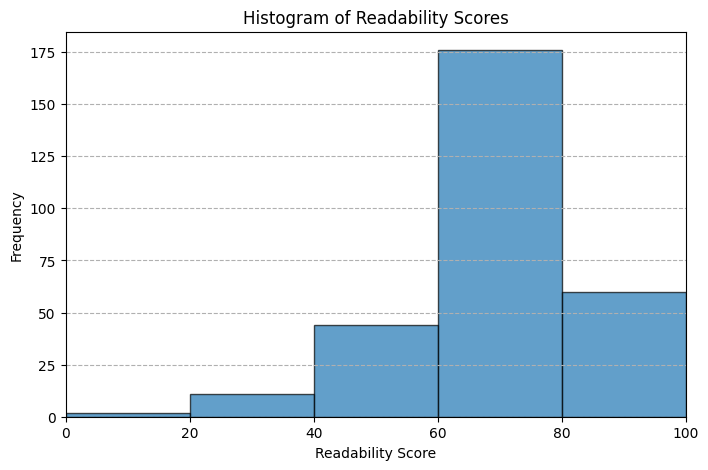

In [0]:
def get_histogram_from_dataset():
    histogram_pd = df.toPandas()
    plt.figure(figsize=(8, 5))
    plt.hist(histogram_pd["readability"], bins=5, range=(0, 100), edgecolor="black", alpha=0.7)
    plt.xlabel("Readability Score")
    plt.ylabel("Frequency")
    plt.title("Histogram of Readability Scores")
    plt.xlim(0, 100) 
    plt.grid(axis='y', linestyle='--')
    plt.show()

get_histogram_from_dataset()